In [2]:
!pip install scikit-multilearn==0.2.0

In [16]:


import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import hamming_loss, accuracy_score, confusion_matrix, multilabel_confusion_matrix

from transformers import AutoTokenizer

     

import pandas as pd
import numpy as np
     

df_l1= pd.read_csv('/kaggle/input/hertlex-hindi-data/train_hi_l1.csv')
df_l1




     


,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0


In [17]:


df_l1_test = pd.read_csv('/kaggle/input/hertlex-hindi-data/test_hi_l1.csv', encoding='utf-8', engine='python')
df_l1_test
     
	

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN
...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_1,NaN,0.0,NaN,0.0,1.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_1,NaN,0.0,NaN,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_1,0.0,NaN,NaN,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_1,0.0,NaN,0.0,0.0,NaN


In [18]:
df_l3= pd.read_csv('/kaggle/input/hertlex-hindi-data/train_hi_l3.csv')
df_l3

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_3,NaN,NaN,NaN,0.0,NaN
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_3,NaN,0.0,NaN,NaN,NaN
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_3,NaN,NaN,NaN,NaN,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_3,NaN,NaN,NaN,0.0,NaN
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_3,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_3,NaN,NaN,NaN,0.0,NaN
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_3,NaN,1.0,NaN,NaN,NaN
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_3,NaN,NaN,NaN,1.0,NaN
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_3,NaN,NaN,NaN,NaN,0.0


In [19]:
df_l3_test =pd.read_csv('/kaggle/input/hertlex-hindi-data/test_hi_l3.csv', encoding='utf-8', engine='python')

df_l3_test


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_3,NaN,1.0,1.0,1.0,NaN
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_3,NaN,1.0,1.0,1.0,NaN
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_3,0.0,0.0,0.0,NaN,NaN
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_3,NaN,0.0,0.0,1.0,NaN
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_3,1.0,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_3,NaN,0.0,NaN,1.0,0.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_3,NaN,0.0,NaN,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_3,1.0,NaN,NaN,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_3,1.0,NaN,1.0,1.0,NaN


In [ ]:
annotation_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  


     

In [21]:
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label, axis=1)
df_l1

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_1
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN,0.0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN,0.0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN,0.0
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0,0.0


In [22]:
df_l1_test['label_1'] = df_l1_test[annotation_cols].apply(get_majority_label, axis=1)
df_l1_test


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_1
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN,0.0
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN,0.0
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN,0.0
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN,1.0
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_1,NaN,0.0,NaN,0.0,1.0,0.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_1,NaN,0.0,NaN,1.0,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_1,0.0,NaN,NaN,0.0,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_1,0.0,NaN,0.0,0.0,NaN,0.0


In [ ]:
df_l3['label_3'] = df_l3[annotation_cols].apply(get_majority_label, axis=1)
df_l3
     

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_3
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_3,NaN,NaN,NaN,0.0,NaN,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_3,NaN,0.0,NaN,NaN,NaN,0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_3,NaN,NaN,NaN,NaN,0.0,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_3,NaN,NaN,NaN,0.0,NaN,0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_3,NaN,1.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_3,NaN,NaN,NaN,0.0,NaN,0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_3,NaN,1.0,NaN,NaN,NaN,1
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_3,NaN,NaN,NaN,1.0,NaN,1
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_3,NaN,NaN,NaN,NaN,0.0,0


In [24]:
df_l3_test['label_3'] = df_l3_test[annotation_cols].apply(get_majority_label, axis=1)
df_l3_test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_3
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_3,NaN,1.0,1.0,1.0,NaN,1.0
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_3,NaN,1.0,1.0,1.0,NaN,1.0
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_3,0.0,0.0,0.0,NaN,NaN,0.0
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_3,NaN,0.0,0.0,1.0,NaN,0.0
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_3,1.0,NaN,1.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_3,NaN,0.0,NaN,1.0,0.0,0.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_3,NaN,0.0,NaN,1.0,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_3,1.0,NaN,NaN,0.0,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_3,1.0,NaN,1.0,1.0,NaN,1.0


In [ ]:
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],
    'label_3': df_l3['label_3']
})

df = df.dropna(subset=['label_1', 'label_3'])

df['label_1'] = df['label_1'].astype(int)
df['label_3'] = df['label_3'].astype(int)

# Preview
print(df.head())
print(df.shape)

                                                text  label_1  label_3
0    भारत में तीन किसान कानून बिल वापस लेने पर भक...        0        0
1    राजस्थान  अजीबोगरीब: गांव की खुशहाली के लिए ...        0        0
2    सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...        0        0
3  !!हर शब्द अमॄतम!!  पुरानी एक कहावत है... टूटी ...        0        0
4  "PM मोदी जी " की माँ के लिए अपशब्द कहने वाला द...        1        1
(6196, 3)


In [26]:
df_test = pd.DataFrame({
    'text': df_l1_test['text'],
    'label_1': df_l1_test['label_1'],
    'label_3': df_l3_test['label_3']
})

df_test = df_test.dropna(subset=['label_1', 'label_3'])

# Convert to int
df_test['label_1'] = df_test['label_1'].astype(int)
df_test['label_3'] = df_test['label_3'].astype(int)

# Preview
print(df_test.head())
print(df_test.shape)

                                                text  label_1  label_3
0  #BandraStation #SharadPawar #Muradabad  अगर अभ...        0        1
1  #ConspiracyAgainstIndia  सुन लो रे देश के गद्द...        0        1
2  #MarathaReservation : महाराष्ट्र में जश्न का म...        0        0
3  #RheaChakraborty aap Mahesh bhatt se madad kiy...        1        0
4  #SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...        0        1
(1516, 3)


In [27]:
df.head(85)

,text,label_1,label_3
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,0,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,0,0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,0,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,0,0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",1,1
...,...,...,...
80,#सीधी_बात_नो_बकवास राम मंदिर नही तो वोट नही.....,0,1
81,#सैनी_क्षत्रिय_रेजिमेंट_हक_है_हमारा #चमार_रेज...,0,0
82,#हलाल_मुक्त_दिवाली चाहिए तो हराम की टट्टी खाना...,0,1
83,' इंडिया के पापा ' कौन देश को बताने वाली आंटी ...,0,0


In [ ]:
import re
def normalize_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)          
    text = re.sub(r'<.*?>', '', text)                          
    text = re.sub(r'\s+', ' ', text).strip()  
    text = re.sub(r'[@#][\w.-]+', '[USER]', text)  

    return text

In [29]:
df['text'] = df['text'].apply(normalize_text)
df


,text,label_1,label_3
0,भारत में तीन किसान कानून बिल वापस लेने पर भक्त...,0,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए रात...,0,0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम ग...,0,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी क...,0,0
4,"""pm मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",1,1
...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली :...",0,0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,0,1
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 school में हमें सती प...,0,1
6195,"🚩 [USER]ंका का जिहादी डॉक्टर,हजारों हिंदू महिल...",0,0


In [30]:


df_test['text'] = df_test['text'].apply(normalize_text)
df_test

     


,text,label_1,label_3
0,[USER] [USER] [USER] अगर अभी आपको होश आ गया हो...,0,1
1,[USER] सुन लो रे देश के गद्दारों घर के और बाहर...,0,1
2,[USER] : महाराष्ट्र में जश्न का माहौल [USER] [...,0,0
3,[USER] aap mahesh bhatt se madad kiyu nahi mag...,1,0
4,"[USER] हमे पता नहि क्या कहते है ,इतना पता है ज...",0,1
...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,0,0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",1,1
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संविध...,0,0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़ी...,0,1


In [ ]:
from sklearn.model_selection import train_test_split

df['label_combo'] = df['label_1'].astype(str) + '_' + df['label_3'].astype(str)

train_df, val_df = train_test_split(
    df,
    test_size=0.15,
    random_state=42,
    stratify=df['label_combo']
)

train_df = train_df.drop(columns='label_combo')
val_df = val_df.drop(columns='label_combo')

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")


Train size: 5266
Validation size: 930


In [32]:
train_df.head(100)

,text,label_1,label_3
3616,किसी मादरजात की हरकत है।,1,0
372,अबे हलाला के 😂😂😂 लगता है तू योगी के चेले का है...,1,0
2941,waqt as gaya hai is desh se farari kaatne ka y...,0,1
2627,kya kar rahi ho,0,0
11,"""हथियारों के खरीद को लेकर भारत पर दबाव बना रहा...",0,0
...,...,...,...
3114,ye sochke mi ye show shuru kiya ki ek cute si ...,0,1
3361,आयेगातो मोदी ही,0,0
159,इतिहास गवाह है सर औरत को हमेशा ही पैर की जूती ...,0,0
4930,साले सब कुत्ते देश द्रोही सुअर की औलाद है,0,1


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt


def load_embeddings(embedding_path,max_vocab_size=None):
    embeddings_index = {}
    
    # First pass: count lines to determine vocab size
    with open(embedding_path, 'r', encoding='utf-8') as f:
        n_words, dim = map(int, f.readline().split())
        if max_vocab_size:
            n_words = min(n_words, max_vocab_size)
    
    embedding_matrix = np.zeros((n_words + 1, dim))  
    word_index = {}
    
    with open(embedding_path, 'r', encoding='utf-8') as f:
        f.readline()
        
        for idx, line in enumerate(f):
            if max_vocab_size and idx >= max_vocab_size:
                break
                
            values = line.rstrip().split(' ')
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            
            word_index[word] = idx + 1  
            embedding_matrix[idx + 1] = vector
    
    return word_index, embedding_matrix

class HindiMultiTaskDataset(Dataset):
    def __init__(self, df, word_index, max_len=128):
        self.texts = df['text'].apply(normalize_text).tolist()
        self.label1 = df['label_1'].astype(float).tolist()
        self.label3 = df['label_3'].astype(float).tolist()
        self.word_index = word_index
        self.max_len = max_len
        self.unk_token = 0


    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        if idx >= len(self):
            raise IndexError(f"Index {idx} out of range for dataset size {len(self)}")
            
        tokens = self.texts[idx].split()[:self.max_len]
        sequence = [self.word_index.get(word, self.unk_token) for word in tokens]

        # Pad/truncate
        if len(sequence) < self.max_len:
            sequence = sequence + [0] * (self.max_len - len(sequence))
        else:
            sequence = sequence[:self.max_len]
            
        return {
            'input_ids': torch.tensor(sequence, dtype=torch.long),
            'label_1': torch.tensor(self.label1[idx], dtype=torch.float),
            'label_3': torch.tensor(self.label3[idx], dtype=torch.float)
        }



import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class HindiBiLSTMCNN(nn.Module):
    def __init__(self, embedding_matrix, lstm_units=128, cnn_filters=100):
        super().__init__()
        
        self.embedding = nn.Embedding.from_pretrained(
            torch.FloatTensor(embedding_matrix),
            padding_idx=0,
            freeze=False
        )
        
        self.bilstm = nn.LSTM(
            input_size=embedding_matrix.shape[1],
            hidden_size=lstm_units,
            bidirectional=True,
            batch_first=True,
            num_layers=2,  
            dropout=0.2

            
        )
        
        self.conv3 =  nn.Sequential(
            nn.Conv1d(2*lstm_units, cnn_filters, 3, padding=1),
            nn.BatchNorm1d(cnn_filters),
            nn.ReLU()
        )
        self.conv5 = nn.Sequential(
            nn.Conv1d(2*lstm_units, cnn_filters, 5, padding=2),
            nn.BatchNorm1d(cnn_filters),
            nn.ReLU())
        
        self.classifier = nn.Linear(2*cnn_filters, 2)  # For 2 labels
        
    def forward(self, x):
        # x shape: [batch_size, seq_len]
        x = self.embedding(x) 
        
        x, _ = self.bilstm(x)  
        x = x.permute(0, 2, 1) 
        
        c3 = torch.relu(self.conv3(x)).max(dim=2)[0]  
        c5 = torch.relu(self.conv5(x)).max(dim=2)[0]
        
        features = torch.cat([c3, c5], dim=1)
        return torch.sigmoid(self.classifier(features))

def train_model(model, train_loader,val_loader, epochs=10,lr = 0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  
    loss_fn = nn.BCELoss()
    
    train_losses, val_losses = [], []
    best_val_loss = float('inf')

    for epoch in range(epochs):
        model.train()
        epoch_train_loss = 0
        for batch in train_loader:
            inputs = batch['input_ids'].to(device)
            labels = torch.stack([batch['label_1'], batch['label_3']], dim=1).to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
        
        model.eval()
        epoch_val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                inputs = batch['input_ids'].to(device)
                labels = torch.stack([batch['label_1'], batch['label_3']], dim=1).to(device)
                outputs = model(inputs)
                epoch_val_loss += loss_fn(outputs, labels).item()
        
        avg_train_loss = epoch_train_loss/len(train_loader)
        avg_val_loss = epoch_val_loss/len(val_loader)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pt')
        
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show

In [ ]:
from sklearn.metrics import f1_score

def evaluate_model(model, data_loader, device='cuda'):
    model.eval()
    y_true_1 = []
    y_pred_1 = []
    y_true_3 = []
    y_pred_3 = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            
            label_1 = batch['label_1'].to(device)
            label_3 = batch['label_3'].to(device)

            outputs = model(input_ids)
            pred_1 = (outputs[:, 0] > 0.5).int().cpu().numpy()  
            pred_3 = (outputs[:, 1] > 0.5).int().cpu().numpy()  

            y_true_1.extend(label_1.cpu().numpy())
            y_pred_1.extend(pred_1)
            y_true_3.extend(label_3.cpu().numpy())
            y_pred_3.extend(pred_3)

    f1_1 = f1_score(y_true_1, y_pred_1, average='macro')
    f1_3 = f1_score(y_true_3, y_pred_3, average='macro')

    print(f"Macro F1-score for Label 1 (gendered abuse): {f1_1:.4f}")
    print(f"Macro F1-score for Label 3 (explicit content): {f1_3:.4f}")
    return f1_1, f1_3



Loading Tamil FastText embeddings...
Epoch 1/10 | Train Loss: 0.6721 | Val Loss: 0.7518
Epoch 2/10 | Train Loss: 0.6553 | Val Loss: 0.6996
Epoch 3/10 | Train Loss: 0.6463 | Val Loss: 0.6516
Epoch 4/10 | Train Loss: 0.6376 | Val Loss: 0.6296
Epoch 5/10 | Train Loss: 0.6314 | Val Loss: 0.6303
Epoch 6/10 | Train Loss: 0.6289 | Val Loss: 0.6424
Epoch 7/10 | Train Loss: 0.6269 | Val Loss: 0.6344
Epoch 8/10 | Train Loss: 0.6261 | Val Loss: 0.6288
Epoch 9/10 | Train Loss: 0.6214 | Val Loss: 0.6471
Epoch 10/10 | Train Loss: 0.6230 | Val Loss: 0.6272

Validation Results:
Macro F1-score for Label 1 (gendered abuse): 0.4202
Macro F1-score for Label 3 (explicit content): 0.5781

Test Results:
Macro F1-score for Label 1 (gendered abuse): 0.4414
Macro F1-score for Label 3 (explicit content): 0.6400


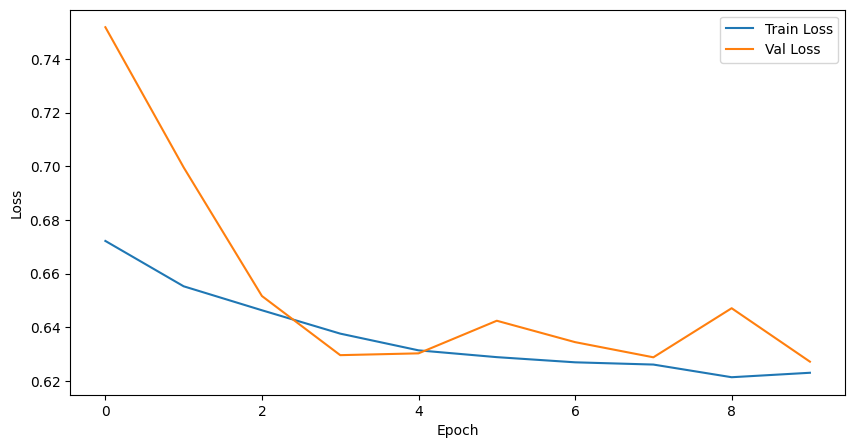

In [ ]:
if __name__ == "__main__":
    word_index, embedding_matrix = load_embeddings('/kaggle/input/hertlex-hindi-data/cc.hi.300.vec',max_vocab_size=2000)
    model = HindiBiLSTMCNN(embedding_matrix)

    train_dataset = HindiMultiTaskDataset(train_df, word_index)
    val_dataset = HindiMultiTaskDataset(val_df, word_index)
    test_dataset = HindiMultiTaskDataset(df_test, word_index)

   
    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=8)
    test_loader = DataLoader(test_dataset, batch_size=8)

    train_model(model, train_loader, val_loader, epochs=10)

    print("\nValidation Results:")
    evaluate_model(model, val_loader)
    
    print("\nTest Results:")
    evaluate_model(model, test_loader)